In [1]:
%%time
try:
    import os, sys
    sys.path.insert(1, os.path.abspath('/home/runner/work/psi4/psi4/code/objdir/stage//usr/local/psi4/lib/'))
except ImportError:
    pass

import psi4

psi4.core.set_output_file('output.dat', False)

CPU times: user 402 ms, sys: 174 ms, total: 576 ms
Wall time: 8.42 s


In [5]:
%%time
psi4.set_memory('500 MB')

h2o = psi4.geometry("""
O
H 1 0.96
H 1 0.96 2 104.5
""")

psi4.energy('scf/cc-pvdz')

CPU times: user 308 ms, sys: 16.7 ms, total: 325 ms
Wall time: 329 ms


-76.0266327350902

In [8]:
%%time
R = 1.075
A = 133.93

ch2 = psi4.geometry("""
0 3
C
H 1 {0}
H 1 {0} 2 {1}
""".format(R, A)
)

psi4.set_options({'reference': 'uhf'})
psi4.energy('scf/6-31g**')

CPU times: user 301 ms, sys: 2.82 ms, total: 303 ms
Wall time: 307 ms


-38.92533462893707

In [9]:
%%time
psi4.set_options({'reference': 'rhf'})
psi4.optimize('scf/cc-pvdz', molecule=h2o)

Optimizer: Optimization complete!
CPU times: user 860 ms, sys: 45.4 ms, total: 905 ms
Wall time: 913 ms


-76.02703272937481

In [11]:
%%time
scf_e, scf_wfn = psi4.frequency('scf/cc-pvdz', molecule=h2o, return_wfn=True)

CPU times: user 1.01 s, sys: 25.8 ms, total: 1.04 s
Wall time: 1.07 s


In [12]:
%%time

dimer = psi4.geometry("""
0 1
C   0.000000  -0.667578  -2.124659
C   0.000000   0.667578  -2.124659
H   0.923621  -1.232253  -2.126185
H  -0.923621  -1.232253  -2.126185
H  -0.923621   1.232253  -2.126185
H   0.923621   1.232253  -2.126185
--
0 1
C   0.000000   0.000000   2.900503
C   0.000000   0.000000   1.693240
H   0.000000   0.000000   0.627352
H   0.000000   0.000000   3.963929
units angstrom
""")

CPU times: user 1.15 ms, sys: 14 µs, total: 1.16 ms
Wall time: 1.17 ms


In [13]:
%%time
psi4.set_options({'scf_type': 'df',
                  'freeze_core': 'true'})

psi4.energy('sapt0/jun-cc-pvdz', molecule=dimer)

CPU times: user 4 s, sys: 260 ms, total: 4.26 s
Wall time: 4.38 s


-0.0022355823909805178

In [14]:
%%time

ne2_geometry = """
Ne
--
Ne 1 {0}
"""

Rvals = [2.5, 3.0, 4.0]

psi4.set_options({'freeze_core': 'true'})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ne2 = psi4.geometry(ne2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ne2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))

CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            2.5                        0.758605
            3.0                        0.015968
            4.0                        -0.016215
CPU times: user 5.8 s, sys: 1.43 s, total: 7.23 s
Wall time: 9.7 s


In [19]:
# part 2: compute the energy of two Argon molecules at distances from 3.5 to 6 angstroms
Ar2_geometry = """
Ar
--
Ar 1 {0}
"""

Rvals = [3.5, 4.0, 4.5, 5.0, 5.5, 6.0]

psi4.set_options({'freeze_core': 'true'})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    Ar2 = psi4.geometry(Ar2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=Ar2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))

CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            3.5                        0.169820
            4.0                        -0.122889
            4.5                        -0.095152
            5.0                        -0.055968
            5.5                        -0.032099
            6.0                        -0.018882


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

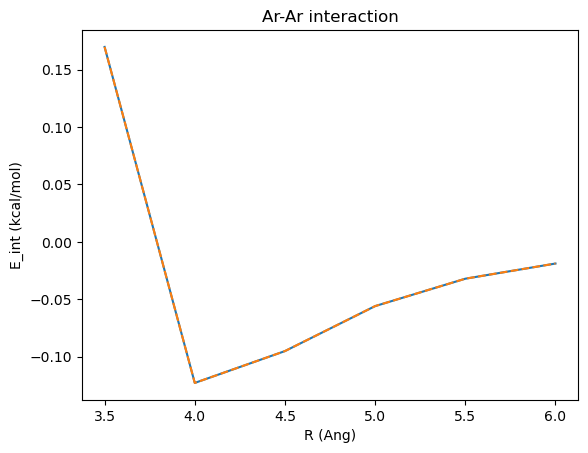

In [22]:
# x axis values
x = [3.5, 4.0, 4.5, 5.0, 5.5, 6.0]
# corresponding y axis values
y = [0.169820, -0.122889, -0.095152, -0.055968, -0.032099, -0.018882]
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('R (Ang)')
# naming the y axis
plt.ylabel('E_int (kcal/mol)')
  
# giving a title to my graph
plt.title('Ar-Ar interaction')
  
# function to show the plot
plt.plot(x, y, linestyle='dashed')
plt.show()

In [26]:
def lj(r,sigma,eps):
    return 4*eps*( (sigma/r)**12-(sigma/r)**6  )

sc.optimize.curve_fit(lj, x, y)

(array([ 4.54840317e-01, -3.43797021e+03]),
 array([[8.42184854e+09, 3.77274201e+14],
        [3.77274201e+14, 1.69007816e+19]]))

In [27]:
# for every 0.25
Ar2_geometry = """
Ar
--
Ar 1 {0}
"""

Rvals = [3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0]

psi4.set_options({'freeze_core': 'true'})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    Ar2 = psi4.geometry(Ar2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=Ar2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))

CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            3.5                        0.169820
            3.8                        -0.069454
            4.0                        -0.122889
            4.2                        -0.116450
            4.5                        -0.095152
            4.8                        -0.073689
            5.0                        -0.055968
            5.2                        -0.042323
            5.5                        -0.032099
            5.8                        -0.024511
            6.0                        -0.018882


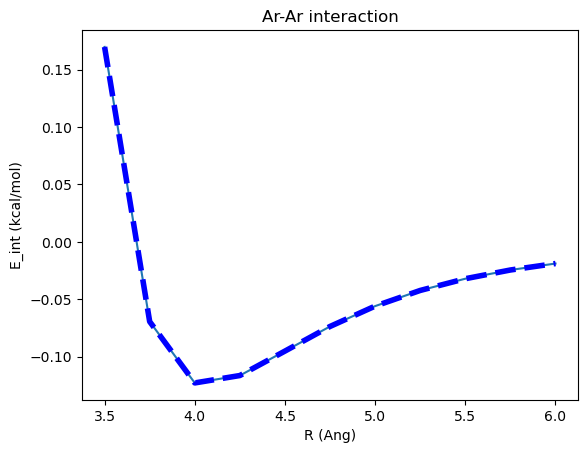

In [29]:
# x axis values
x = [3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0]
# corresponding y axis values
y = [0.169820, -0.069454, -0.122889, -0.116450, -0.095152, -0.073689, -0.055968, -0.042323, -0.032099, -0.024511, -0.018882]
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('R (Ang)')
# naming the y axis
plt.ylabel('E_int (kcal/mol)')
  
# giving a title to my graph
plt.title('Ar-Ar interaction')
  
# function to show the plot
plt.plot(x, y, linestyle='dashed', color='blue', linewidth=4)
plt.show()